<a href="https://colab.research.google.com/github/rosenfa/nn/blob/master/Log_Reg_From_Scratch_Iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 

Using the Iris dataset to perform logistic regression from scratch in python. We already saved a nice file on my Github.

In [5]:
url = "https://github.com/rosenfa/nn/blob/master/iris2.csv?raw=true"
df_iris=pd.read_csv(url,  header=0, error_bad_lines=False) 

In [6]:
df_iris

,sepal.length,sepal.width,petal.length,petal.width,Species
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,0
96,5.7,2.9,4.2,1.3,0
97,6.2,2.9,4.3,1.3,0
98,5.1,2.5,3.0,1.1,0


Adding a column of 1's to the X matrix for the bias terms.

In [12]:
X = np.asarray(df_iris.drop('Species',1))
X = np.append(np.ones([len(X),1]),X,1)
y = np.asarray(df_iris['Species'])
X[0]
y[0]

1

In [ ]:
Now make the theta vector. Note that X.shape returns two values and the 1 value is the number of columns (attributes + b)

In [13]:
theta = np.zeros(X.shape[1])
theta

array([0., 0., 0., 0., 0.])

Here we define our activation function; the sigmoid function 

$h_{\theta}(x) = g(\theta^{T}x)$

$z = \theta^{T}x$

$g(z) = \frac{1}{1+e^{(-z)}}$




X := data set

$\theta$ := vector of weights



h = hypothesis

In [14]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

z = np.dot(X, theta)
h = sigmoid(z)

Next we will define our loss (Cost) function:


$J(\theta) = \frac{1}{m} * (-y * log(h) - (1-y)log(1-h)) $

---



Note: when y = 0 the first half of the equation is 0,  
and when y = 1, the second half of the equation is equal to 0.

In [15]:
def loss(h, y):
    return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()

$\frac{\delta J(\theta)}{\delta\theta_{j}} = \frac{1}{m} * X^{T}$

In [17]:
gradient = np.dot(X.T, (h - y)) / y.shape[0]

We then subtract our values for theta by our chose learning rate * the gradient and loop for gradient descent.

In [18]:
def predict_probs(X, theta):
    return sigmoid(np.dot(X, theta))


def predict(X, theta, threshold=0.5):
    if predict_probs(X, theta) >= threshold:
        return 1
    return 0
    #return predict_probs(X, theta) >= threshold

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [21]:
X_train.shape

(67, 5)

In [20]:
#fit the data 
cost_array = [] # keeping a list of the cost at each iteration to make sure it is constantly decreasing
iterations = 1000 
lr = 0.01

for i in range(iterations):
    z = np.dot(X_train, theta)
    a = sigmoid(z)
    gradient = np.dot(X_train.T, (a - y_train)) / y_train.shape[0]

    theta -= lr * gradient
    cost = loss(a, y_train)
    cost_array.append(cost)



Interesting to note that depending on what my intial values for theta the final values ended up being very different even though each time they all performed correctly.

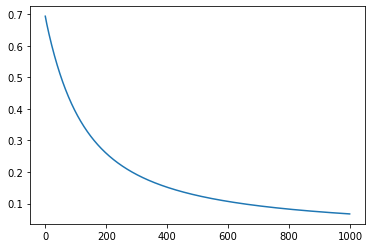

In [22]:
plt.plot(cost_array)
#plotting the cost against the number of iterations to make sure our model is improving the whole time

In [23]:
cost

0.06726916069195697

Now We will test our model on our test data.

In [24]:
incorrect = 0

for x,y in zip(X_test, y_test):
    p = predict(x, theta)
    if p != y:
        incorrect += 1

n = len(y_test)
accuracy = (n-incorrect)/n
print("accuracy: {}".format(accuracy))


accuracy: 1.0


It looks like our model is performing accurately! 

Now we will use the sklearn built in functions to compare our attained model

In [25]:
from sklearn.linear_model import LogisticRegression
sk_model = LogisticRegression()     
sk_model.fit( X_train, y_train ) 

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [26]:
accuracy = sk_model.score(X_test, y_test)
print("accuracy = ", accuracy * 100, "%")

accuracy =  100.0 %


Note that while the results are the same, the weights weren't!

In [29]:
print('Coefficients: \n', sk_model.coef_)

Coefficients: 
 [[-2.70168725e-07 -3.74773342e-01  7.73800834e-01 -2.11240611e+00
  -9.09081989e-01]]


In [31]:
print(theta)

[ 0.17915127  0.31233259  1.00876533 -1.6035587  -0.70958214]
